$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

$$s = \sqrt{\frac{1}{N-1}}$$

$$c = \sqrt{a^2 + b^2}$$

## Agenda
1. What is Bootstrapping?
2. Why would we use Bootstrapping?
3. Calculating Confidence Intervals using Bootstrapping
4. Example in Python
5. How to measure the goodness of bootstrapping
6. Estimating Bias through Bootstrapping

## Introduction
Welcome! As you know, the topic of this webinar is Bootstrapping in Statistical Inference. Let me start with some questions to motivate this. I fully realize that bootstrapping may be a new topic. Let me start with a motivating question: *How do you conduct statistical inference, when you don't know what distribution the data comes from?*

## Defining Terms
First of all, we need to make some definitions. For many of you, this beginning segment will be a review. What do we mean by statitical inference? Statistical inference can be thought of as comprising three different, but related tasks: Point estimation, Confidence Intervals, Hypothesis tests. 

In point estimation you are trying to estimate a parameter of interest. What is a parameter? A parameter is commonly defined to be the true value from a distribution. Let's say the median amount of time it takes for customer to be converted from a qualified lead to a paying customer. You don't know what the true value of the time will be, but you can look at historical data to estimate what it is.

In the real world, there is a lot of variability. You might have some people that take longer to convert, and others that take less time. There are a lot of factors that could influence how long they take to convert. If they have extra budget lying around, or if they have to go through an approval process. If they like what they see right away, or if they want to shop around for a while before making a decision. In statistical inference, the concept of a confidence interval is created to summarize, how much variation we can expect to see so we can get a sense of where the true value is, knowing that the empirical data might change on a day-to-day basis. 

Those of you who are more well-versed in statistics will know that the way of interpreting confidence intervals can be controversial, due to a difference in the interpretation between people who describe themselves as Bayesian statisticians, and frequentist statisticians. I'm going to side-step that debate for now, since it is a bigger discussion, and rather use the frequentist way of describing confidence sets for consistency.

Here's a working definition of a confidence interval. Let's make it a 95% Confidence interval for concreteness. A 95% confidence interval is the interval that will contain the true value of the parameter 95% of the time. That means, if you run an experiment 20 times, 19 out of 20 times your confidence interval will contain the true value. Another way to interpret a confidence interval is to say that if you run 20 different experiements, 19 of those experiments will produce a confidence interval that contains the true value.

Last of all, let's define hypothesis testing to be the process of evaluating concrete ideas using data. I CAN DO BETTER.

## What is bootstrapping?

Now that we have that background, what is bootstrapping? Bootstrapping is a statistical technique for making inferences from data. It's name is derived from the idea of picking yourself up from your bootstraps. We'll see later why this might feel like an appropriate name. More specifically, bootstrapping is a flexible statistical technique that allows someone to estimate the bias and variance of a statistic, which in turn enables you to conduct point estimation, confidence sets, and hypothesis tests. Why is it flexible? Two reasons. First, it requires little or no assumptions about the underlying distribution of the data.

If you have a statistic. You can say that this mean value follows a particular sampleing distribution such as a gamma distribution or a normal distribution or a beta distribution. But how do you know what distribution it follows? If you only have one value to work off of, you don't usually know. Now, you can make an assumption, but if you're wrong, your confidence intervals might be wildly off. Bootstrapping allows us to sidestep this difficulty.

Second reason that bootstrapping is flexible. It is able to provide confidence intervals for statistics that have very difficult to calculate variances. As an example of the last point, how would you calculate the variance of the mean? Well, it's pretty easy. It works out to being the sum of the squared difference from the mean, divided by the total number of samples.

INSERT VARIANCE FORMULA

Now then, let's say that you want to calculate the median statistic. What is the variance of that statistic? That one is not so easy. However, that's where bootstrapping can help us out.

## Example
Now, with that background, let's go through a simple example in python. In this example, we will be bootstrapping the correlation between an individual's SAT scores and their college GPA. This examples comes from the data used in the original paper that Bradley Efron published back in 1979. If you'd like to read it I will provide a link to that in the follow-up email that I send out.

In [149]:
# Load packages and setup
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
np.random.seed(100)

In [210]:
# Read in the data
law = pd.read_csv('law_sample.csv')
lawPopulation = pd.read_csv('law_pop.csv')
law.head()

,School,LSAT,GPA
0,4,653,3.12
1,6,576,3.39
2,13,635,3.30
3,15,661,3.43
4,31,605,3.13


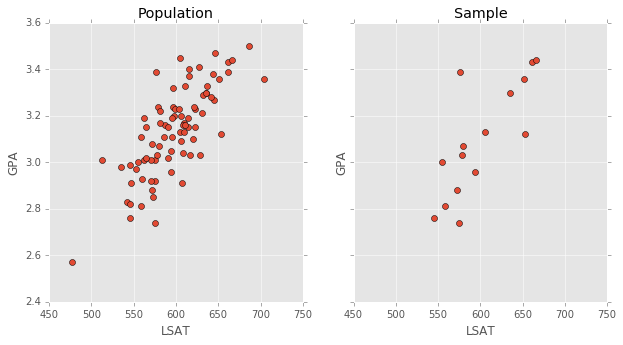

In [178]:
# Visualize the data
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize = (10, 5))

ax[0].plot(lawPopulation.LSAT, lawPopulation.GPA, 'o')
ax[0].set(title='Population', ylabel='GPA', xlabel = 'LSAT')

ax[1].plot(law.LSAT, law.GPA, 'o')
ax[1].set(title='Sample', ylabel='GPA', xlabel = 'LSAT')

In [183]:
def calc_corr(x, y):
    return(np.corrcoef(x, y)[0, 1])

In [196]:
# Set the number of bootstrap iterations
B = 3200

# Create an empty numpy array to store the results
tBoot = np.zeros((B, 1))

# Run the bootstrapping
for i in np.arange(B):
    lawResample = law.sample(n = law.shape[0], replace = True)
    tBoot[i] = calc_corr(lawResample.LSAT, lawResample.GPA)

In [211]:
# Compare the bootstrapped sample with repeated sampling from the population
tSample = np.zeros((B, 1))

# Run the sampling
for i in np.arange(B):
    lawSample = lawPopulation.sample(n = law.shape[0], replace = False)
    tSample[i] = calc_corr(lawSample.LSAT, lawSample.GPA)

[<matplotlib.text.Text at 0x11d279cf8>, <matplotlib.text.Text at 0x11d2c6128>]

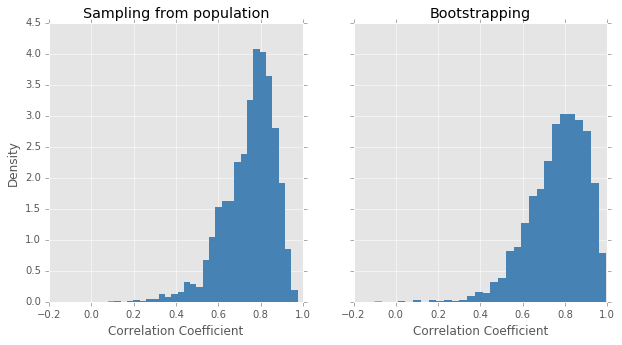

In [217]:
# Show similarity between sampling from population and bootstrapping
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize = (10, 5))
kwargs = dict(bins=30, normed=True, color='steelblue', edgecolor='none')
ax[0].hist(tSample, **kwargs)
ax[0].set(title='Sampling from population', ylabel='Density', xlabel = 'Correlation Coefficient')
ax[1].hist(tBoot, **kwargs)
ax[1].set(title='Bootstrapping', xlabel = 'Correlation Coefficient')

In [ ]:
# Calculate the plug-in estimate
corHat = calc_corr(law.LSAT, law.GPA)

# Calculate the standard error for the correlation coefficient
seHat = np.sqrt(np.var(tBoot))
seHat

In [201]:
# Normal intervals
normalInterval = corHat + seHat * norm.ppf([0.025, 0.975])
normalInterval

array([ 0.51165211,  1.04109688])

In [202]:
# Percentile intervals
percentileInterval = np.percentile(tBoot, [2.5, 97.5])
percentileInterval

array([ 0.46194551,  0.96169933])

In [204]:
cor = calc_corr(lawPopulation.LSAT, lawPopulation.GPA)

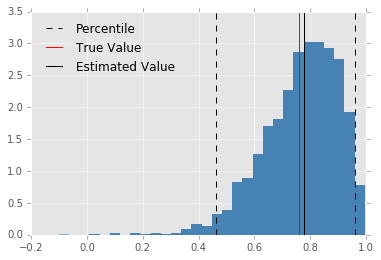

In [209]:
# Plot the results
plt.hist(tBoot, bins=30, normed=True, color='steelblue', edgecolor='none');
plt.axvline(x = percentileInterval[0], linestyle = '--', color = 'black', label = 'Percentile')
plt.axvline(x = percentileInterval[1], linestyle = '--', color = 'black')
plt.axvline(x = cor, label = 'True Value', color = 'red')
plt.axvline(x = corHat, label = 'Estimated Value', color = 'black')
plt.legend(framealpha=1, frameon=False, loc = 'upper left');
plt.show()

In [231]:
law.GPA.values.mean()

3.0946666666666669

In [239]:
import time

In [256]:
# Comparing NumPy and Pandas resampling
B = 1000
testArrray = law.GPA.values
testArrayResult = np.zeros((B, 1))

startNumPyTime = time.time()
for i in np.arange(B):
    arrayResample = np.random.choice(testArrray, size = 15, replace = True)
    testArrayResult[i] = arrayResample.mean()
time.time() - startNumPyTime

0.023602008819580078

In [255]:
testSeries = law.GPA
testSeriesResult = np.zeros((B, 1))

startPandasTime = time.time()
for i in np.arange(B):
    seriesResample = testSeries.sample(n = 15, replace = True)
    testSeriesResult[i] = lawResample.mean()
time.time() - startPandasTime

4.146126985549927

## Ideas
- Comparing the speed of bootstrapping for NumPy and Pandas
- Estimating the bias of a statistic
- Practical Tips for Implementing Bootstrapping
- How to compare bootstrapped results
- Put common tasks into functions

## Done
- Comparison of bootstrapped sample with the original sample
- Example of bootstrapping the correlation coefficient
- Calculation of percentile interval and normal interval
- Historgram plot of bootstrapped results

## References
1. Efron, B. and Tibshirani, R. (1993) An Introduction to the Bootstrap. Chapman and Hall, New
York, London.